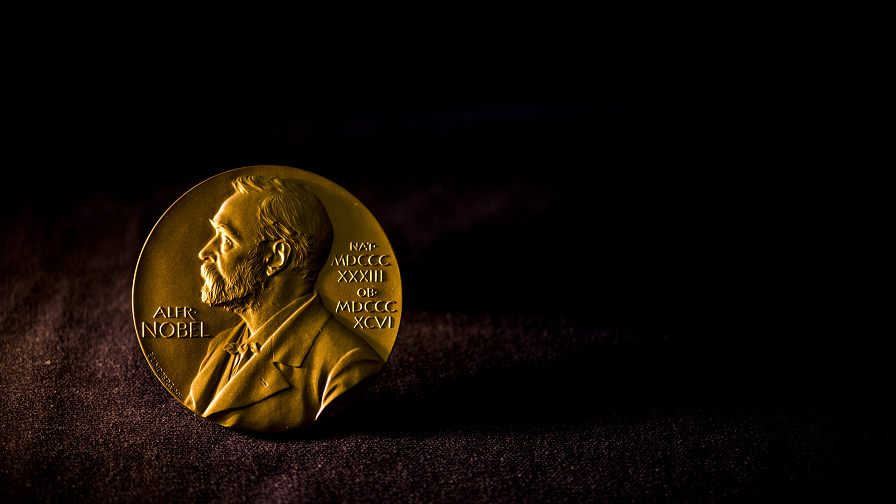

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

**Reading The DataSet**

In [ ]:
df = pd.read_csv('/kaggle/input/a-visual-history-of-nobel-prize-winners-dataset/nobel.csv')
df.head()

In [ ]:
df.tail()

**This DataSet contains record upto 2016 only**

In [ ]:
df.info()

In [ ]:
def percentage_teller(DF):
    for column in DF.columns:
        null_values = DF[column].isnull().sum()
        total_values = df.shape[0]
        percent = (null_values/ total_values)*100
        print("In {0} column {1:.2f} % values are null".format(column, percent))
percentage_teller(df) 

The columns **'death_date',  'death_city',  'death_country'** have considerable amount of null values ,so, i am droping these columns along with other columns **('laureate_id', 'organization_name', 'organization_city')** which are not relatable to further analysis.

In [ ]:
df.drop(['death_date', 'death_city', 'death_country', 'laureate_id', 'organization_name', 'organization_city']
        , axis = 1, inplace = True)

In [ ]:
def auto_label(graph):
    for bar in graph.patches:
        height = bar.get_height()
        plt.annotate(height,
        xy = (bar.get_x() + bar.get_width()/2, height),
        xytext = (0, 3),
        textcoords="offset points", va = 'bottom', ha = 'center')

In [ ]:
plt.figure(figsize = (7, 6))
Graph1 = sns.countplot(df['category'])
auto_label(Graph1)

The Category **Medicine** got more Nobel prize compare to other categories.

In [ ]:
df['birth_country'].unique()

We can see that most of the countries have two names, old names and new names . so i am intrested in new names , so below code will fetch new names which are in brackets **()**. And i am going to replace *'United States of America to USA and United Kingdom to UK'* because of their large length.

In [ ]:
countries = df['birth_country'].copy()
countries.replace({'United States of America':'USA', 'United Kingdom': 'UK'}, inplace = True)
countries.dropna(inplace = True)
countries = countries.str.strip()

COUNTRIES = list()

def remove_bracket(Countries):
    for i in countries:
        if i.endswith(')'):
            i = i.split(' ')[-1]
            n = len(i)
            COUNTRIES.append(i[1:n-1])
        else:
            COUNTRIES.append(i)
            
            
remove_bracket(countries)


In [ ]:
text = " ".join(country for country in COUNTRIES)

wc = WordCloud()
wc.generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.show()

In [ ]:
country = pd.Series(COUNTRIES)
top_10_country = country.value_counts().nlargest(10).index
nobel = country.value_counts().nlargest(10).values
with plt.style.context('fivethirtyeight'):
    graph2 = plt.barh(top_10_country[::-1], nobel[::-1])
    for i in graph2:
        width = i.get_width()
        plt.annotate(width, xy = (width, i.get_y() + i.get_height()/2),
                     xytext = (0, 6),
                     textcoords = 'offset points', va = 'top')

By seeing above two figure we can see the dominance of **USA**  with 259 Nobel Prizes upto 2016.

In [ ]:
Female = (df['sex'].value_counts()['Female'] / df['sex'].value_counts().sum()) * 100
Male = 100 - Female

plt.pie([Male, Female], labels = ['Male', 'Female'], shadow = True, wedgeprops={'edgecolor': 'black'},
       autopct='%1.1f%%')

The above Pie graph shows Share of Male and Female in winning Nobel prize.

**Top 5 Youngest People to Win Nobel Prize.**

In [ ]:
year = df['year'] - pd.DatetimeIndex(df['birth_date']).year
age_young = year.nsmallest(5).astype('int64')
name_young = df.iloc[[885, 85, 166, 171, 189], 6]
youngest = pd.concat([name_young, age_young], axis = 1).reset_index().drop(columns = 'index')
youngest.rename(columns = {0:'age', 'full_name':'Name'})

In the above dataframe column *age* represents their age when they got Nobel prize.

This dataset is quite old so it doesn't contain record after 2016.
In 2018 **Nadia Murad** got Nobel prize and becomes 3rd Youngest Nobel Prize Winner at the age of 25. 

If u like this notebook then don't forget to give **UPVOTE** and your suggestion are valuable for me.